### Розвʼязок, якщо нагуглити

Імпортуємо модулі

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Імпортуємо датасет

In [5]:
data = pd.read_csv("/Users/yurab/Desktop/Python for university/MMTAD/Lab0/digital_marketing_campaign_dataset.csv")
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


Обираємо колонки для аналізу

In [7]:
data_clear = data[["CustomerID", "Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints", "Conversion"]]
data_clear

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0
7996,15996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0
7997,15997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1
7998,15998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1


In [11]:
np.random.seed(42) 
data['group'] = np.random.choice(['A', 'B'], size=len(data))

data[['AdSpend', 'group']].head()

,AdSpend,group
0,6497.870068,A
1,3898.668606,B
2,1546.429596,A
3,539.525936,A
4,1678.043573,A


In [12]:
data['group'].value_counts()

group
A    4021
B    3979
Name: count, dtype: int64

In [14]:
group_stats = data.groupby('group')['Conversion'].describe()
group_stats

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,4021.0,0.880378,0.324559,0.0,1.0,1.0,1.0,1.0
B,3979.0,0.872581,0.333484,0.0,1.0,1.0,1.0,1.0


In [15]:
group_a = data[data['group'] == 'A']['Conversion']
group_b = data[data['group'] == 'B']['Conversion']

stat, p = stats.ttest_ind(group_a, group_b)
print(f"T-Test: t={stat:.3f}, p={p:.3f}")

T-Test: t=1.060, p=0.289


In [17]:
for group in ['A', 'B']:
    stat, p = stats.shapiro(data[data['group'] == group]['Conversion'])
    print(f"Group {group}: W={stat:.3f}, p={p:.3f}")

Group A: W=0.378, p=0.000
Group B: W=0.391, p=0.000


Т.як p < 0.05 -> дані не є нормальними

In [18]:
stat, p = stats.levene(
    data[data['group'] == 'A']['Conversion'],
    data[data['group'] == 'B']['Conversion']
)
print(f"Levene Test: W={stat:.3f}, p={p:.3f}")

Levene Test: W=1.123, p=0.289


In [20]:
stat, p = stats.mannwhitneyu(
    data[data['group'] == 'A']['Conversion'],
    data[data['group'] == 'B']['Conversion']
)
print(f"Mann-Whitney U Test: U={stat:.3f}, p={p:.3f}")

Mann-Whitney U Test: U=8062153.500, p=0.289


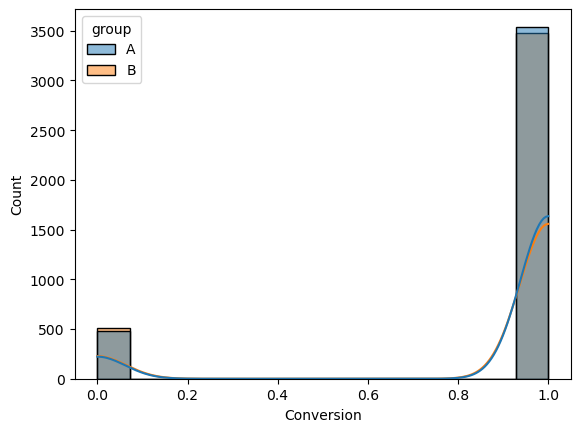

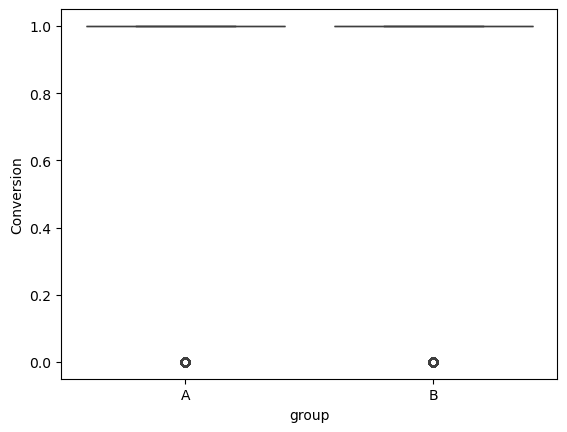

In [22]:
sns.histplot(data, x='Conversion', hue='group', kde=True)
plt.show()

sns.boxplot(x='group', y='Conversion', data=data)
plt.show()

**Висновок:**
Різниці не є значимими

### Розвʼязок за допомогою Chat GPT

Розділення на групи А та В

In [29]:
np.random.seed(42)  
data_clear['group'] = np.random.choice(['A', 'B'], size=len(data_clear))


data_clear.loc[data['group'] == 'B', 'AdSpend'] *= 1.2

sample_a = data_clear[data_clear['group'] == 'A']
sample_b = data_clear[data_clear['group'] == 'B']

/var/folders/d7/mv12n9yn7c1gy3kr948lcfth0000gn/T/ipykernel_7189/511227811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear['group'] = np.random.choice(['A', 'B'], size=len(data_clear))


In [30]:
print("Середнє значення метрик:")
print("Група A:")
print(sample_a[['AdSpend', 'ClickThroughRate', 'Conversion']].mean())
print("Група B:")
print(sample_b[['AdSpend', 'ClickThroughRate', 'Conversion']].mean())

Середнє значення метрик:
Група A:
AdSpend             5028.831754
ClickThroughRate       0.155582
Conversion             0.880378
dtype: float64
Група B:
AdSpend             7160.779510
ClickThroughRate       0.154067
Conversion             0.872581
dtype: float64


T-тест для метрики Conversion

In [31]:
stat, p = stats.ttest_ind(sample_a['Conversion'], sample_b['Conversion'])
print(f"Результати T-тесту для Conversion: t={stat:.3f}, p={p:.3f}")

Результати T-тесту для Conversion: t=1.060, p=0.289


Критерій успіху

In [32]:
conversion_a = sample_a['Conversion'].mean()
conversion_b = sample_b['Conversion'].mean()
print(f"\nConversion A: {conversion_a:.3%}, Conversion B: {conversion_b:.3%}")
if conversion_b >= conversion_a * 1.05 and p < 0.05:
    print("Критерий успеха выполнен: изменения статистически значимы.")
else:
    print("Критерий успеха не выполнен: изменения незначимы.")


Conversion A: 88.038%, Conversion B: 87.258%
Критерий успеха не выполнен: изменения незначимы.
